<a href="https://colab.research.google.com/github/asmaamuhamed20/teeth-classification/blob/main/teeth_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###   Load and Prepare Dataset

In [10]:
!pip install -q gdown

In [12]:
import gdown

file_id = "1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY"
output = "teeth_dataset.zip"

gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY
From (redirected): https://drive.google.com/uc?id=1WEySXMFz6v1OgPkLKJ8QIp3Lk-eyTObY&confirm=t&uuid=f9e8f947-3141-4a5c-a53d-6ab413acab88
To: /content/teeth_dataset.zip
100%|██████████| 49.1M/49.1M [00:00<00:00, 78.1MB/s]


'teeth_dataset.zip'

In [13]:
import zipfile

extract_path = "/content/teeth_dataset"

with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extracted")

Extracted


In [14]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import sklearn

import os

from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam


In [15]:
print(os.listdir(extract_path))

['Teeth_Dataset']


In [16]:
train_dir = "/content/teeth_dataset/Teeth_Dataset/Training"
val_dir   = "/content/teeth_dataset/Teeth_Dataset/Validation"
test_dir  = "/content/teeth_dataset/Teeth_Dataset/Testing"

###   Build & Train Basic CNN Model




In [21]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1508 files belonging to 10 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [22]:
import shutil

test_dir = "/content/teeth_dataset/Teeth_Dataset/Testing"
wanted = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

for cls in os.listdir(test_dir):
    path = os.path.join(test_dir, cls)
    if cls not in wanted and os.path.isdir(path):
        shutil.rmtree(path)
        print(f"Deleted: {cls}")

Deleted: outputs
Deleted: output
Deleted: out


In [23]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int',
    shuffle    = True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size = (128, 128),
    batch_size = 32,
    label_mode = 'int'
)

class_names = train_ds.class_names
print(class_names)

Found 3087 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
Found 1028 files belonging to 7 classes.
['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [24]:
num_classes = len(class_names)
print(num_classes)

7


In [11]:
train_count = train_ds.cardinality().numpy() * 32
val_count = val_ds.cardinality().numpy() * 32
test_count = test_ds.cardinality().numpy() * 32

print(f"{train_count}")
print(f" {val_count}")
print(f" {test_count}")

3104
 1056
 1056


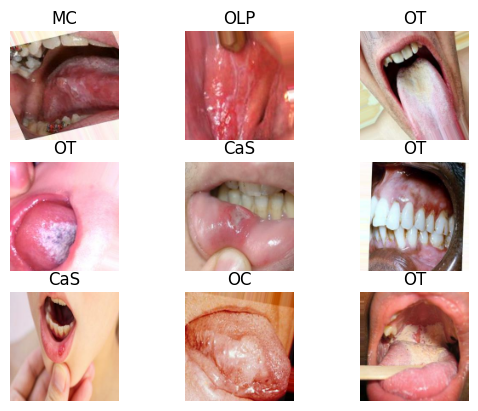

In [16]:
plt.Figure(figsize= (8,8))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')


In [18]:


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

In [19]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size= AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size= AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size= AUTOTUNE)

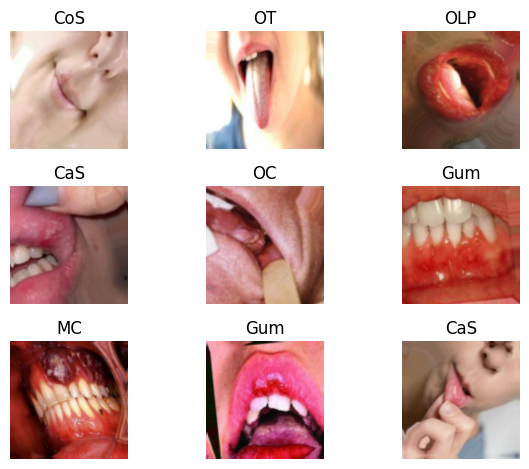

In [20]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()


In [21]:
num_classes = 7

model = keras.Sequential([

    data_augmentation,

    #normalization
    layers.Rescaling(1./255, input_shape = (128, 128, 3)),

    layers.Conv2D(32,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128,(3,3), activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(256,(3,3), activation= 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),

    layers.Dense(128, activation = 'relu'),

    layers.Dropout(0.5),

    layers.Dense(num_classes, activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
optimizer = Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [50]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    # callbacks = [early_stop]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.9779 - loss: 0.0800 - val_accuracy: 0.9767 - val_loss: 0.1171
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9758 - loss: 0.0694 - val_accuracy: 0.9767 - val_loss: 0.1042
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9803 - loss: 0.0621 - val_accuracy: 0.9747 - val_loss: 0.1040
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9849 - loss: 0.0495 - val_accuracy: 0.9776 - val_loss: 0.0966
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9839 - loss: 0.0512 - val_accuracy: 0.9796 - val_loss: 0.1050
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9843 - loss: 0.0528 - val_accuracy: 0.9718 - val_loss: 0.1037
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9827 - loss: 0.0561 - val_accuracy: 0.9786 - val_loss: 0.0887
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9841 - loss: 0.0527 - val_accuracy: 0.

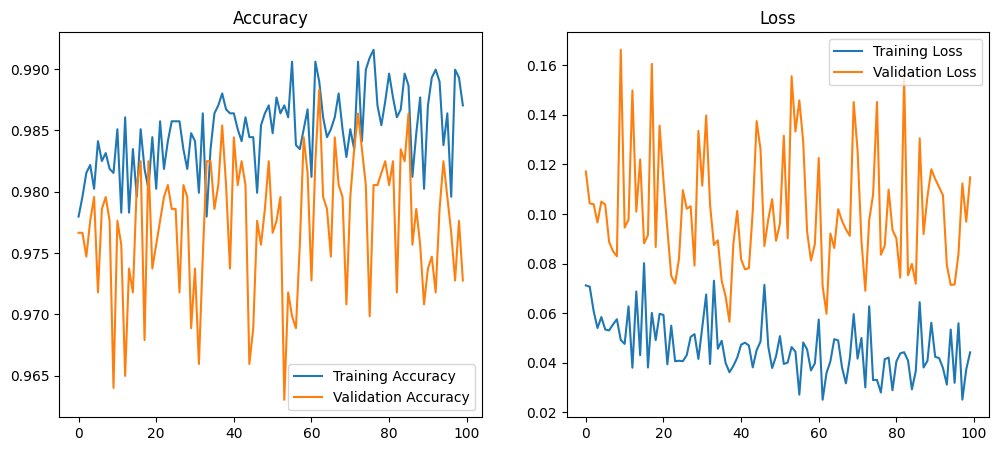

In [51]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [52]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    patience = 5,
    restore_best_weights = True
)

In [53]:
history = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 100,
    callbacks = [early_stop]
)

Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9881 - loss: 0.0347 - val_accuracy: 0.9786 - val_loss: 0.0715
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9871 - loss: 0.0345 - val_accuracy: 0.9825 - val_loss: 0.0668
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9845 - loss: 0.0390 - val_accuracy: 0.9854 - val_loss: 0.0522
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9939 - loss: 0.0243 - val_accuracy: 0.9660 - val_loss: 0.1938
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9840 - loss: 0.0442 - val_accuracy: 0.9718 - val_loss: 0.1204
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9885 - loss: 0.0333 - val_accuracy: 0.9708 - val_loss: 0.1152
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9921 - loss: 0.0222 - val_accuracy: 0.9786 - val_loss: 0.0883
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9912 - loss: 0.0334 - val_accuracy: 0.

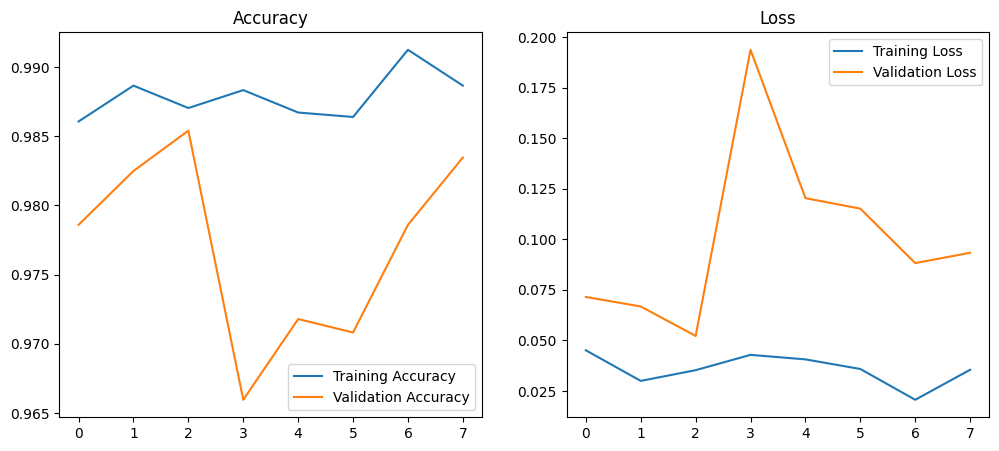

In [54]:
acc     = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()

In [55]:
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9869 - loss: 0.0639
Test Accuracy: 0.9835
Test Loss: 0.0868


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (32, 128, 128, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 126, 126, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 63, 63, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 61, 61, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 28, 28, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 14, 14, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 12, 12, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 6, 6, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 9216)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 128)              │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (32, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 7)                │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,707,287 (17.96 MB)

 Trainable params: 1,569,095 (5.99 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,138,192 (11.97 MB)

### pretrain model Fine-tuning

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras import Input
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.optimizers import Adam

# loading pretrain model without first layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
print(len(base_model.layers)) # numbers of layers

175


In [18]:
base_model.trainable = False


In [19]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])


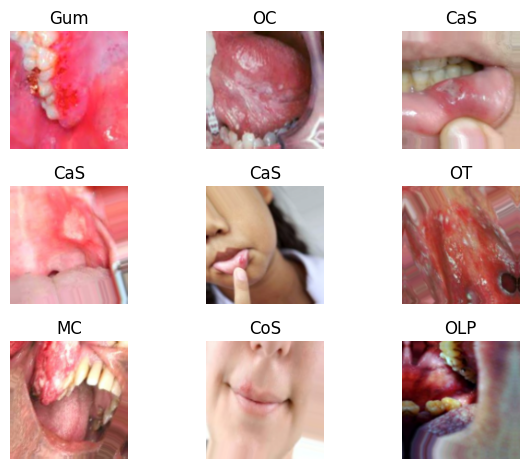

In [25]:
plt.Figure(figsize= (10, 10))
for images, labels in train_ds.take(1):
    augmented_img = data_augmentation(images)
    for i in range(9):
        ax = plt.subplot(3, 3, i +1)
        plt.imshow(augmented_img[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

plt.tight_layout()
plt.show()

In [26]:

inputs = tf.keras.Input(shape=(128,128,3))
x = preprocess_input(inputs)      # normalization
x = data_augmentation(inputs)
x = base_model(inputs, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)

In [27]:
model.compile(optimizer= Adam(learning_rate=0.00005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [28]:
base_model.trainable = True

In [29]:
for layer in base_model.layers[:-40]:
    layer.trainable = False        #  train 40 layers

In [30]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [31]:
history = model.fit(train_ds, validation_data=val_ds, epochs=15)

Epoch 1/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 218ms/step - accuracy: 0.6206 - loss: 1.3110 - val_accuracy: 0.7860 - val_loss: 1.0574
Epoch 2/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 16s 73ms/step - accuracy: 0.9627 - loss: 0.1180 - val_accuracy: 0.9270 - val_loss: 0.2167
Epoch 3/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9890 - loss: 0.0484 - val_accuracy: 0.8259 - val_loss: 1.0194
Epoch 4/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9865 - loss: 0.0424 - val_accuracy: 0.8842 - val_loss: 0.4171
Epoch 5/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 74ms/step - accuracy: 0.9832 - loss: 0.0730 - val_accuracy: 0.9309 - val_loss: 0.2285
Epoch 6/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.9932 - loss: 0.0260 - val_accuracy: 0.9543 - val_loss: 0.1753
Epoch 7/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9900 - loss: 0.0365 - val_accuracy: 0.9095 - val_loss: 0.4339
Epoch 8/15
97/97 ━━━━━━━━━━━━━━━━━━━━ 7s 72ms/step - accuracy: 0.9913 - loss: 0.0316 - val_accuracy: 0.95

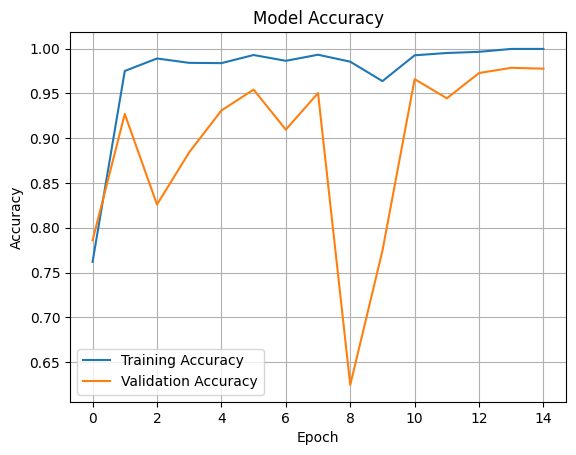

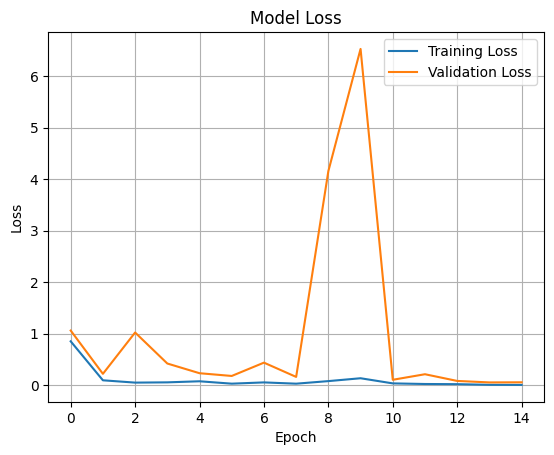

In [32]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.4f}")

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9736 - loss: 0.0680
Test Accuracy: 0.9786


In [34]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ resnet50 (Functional)           │ (None, 4, 4, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 7)              │        14,343 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,294,359 (210.93 MB)

 Trainable params: 15,846,151 (60.45 MB)

 Non-trainable params: 7,755,904 (29.59 MB)

 Optimizer params: 31,692,304 (120.90 MB)

In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
test_folder = '/content/drive/My Drive/test_imges'

In [32]:
def load_and_prepare_image(local_path):
    img = load_img(local_path, target_size=(128, 128))
    img_array = img_to_array(img)
    img_array = tf.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img, img_array

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


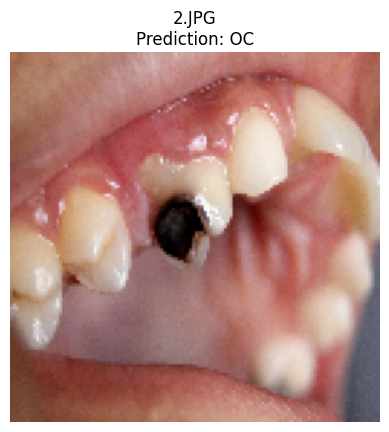

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


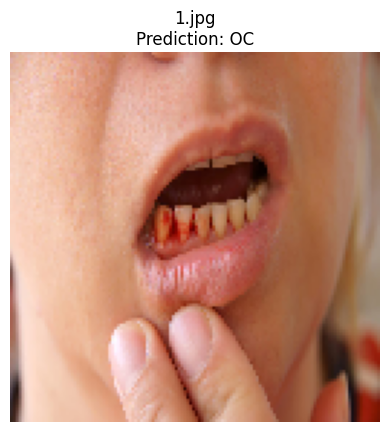

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


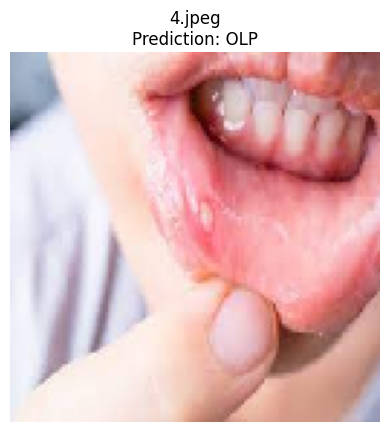

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


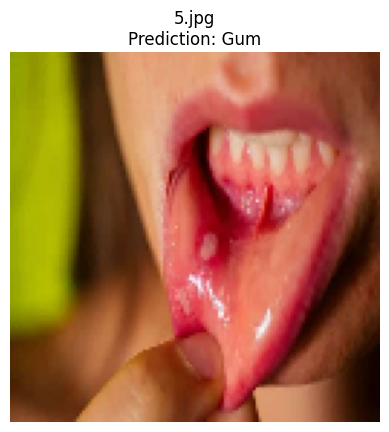

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


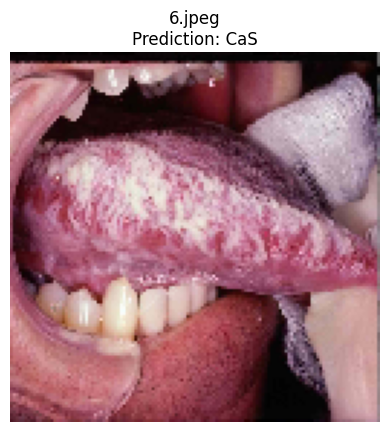

In [33]:
for filename in os.listdir(test_folder):
    if filename.lower().endswith(('.jpg', '.png', '.jpeg')):
        img_path = os.path.join(test_folder, filename)
        try:
            original_img, img_array = load_and_prepare_image(img_path)
            prediction = model.predict(img_array)
            pred_class = np.argmax(prediction)
            class_name = class_names[pred_class]

            plt.imshow(original_img)
            plt.axis('off')
            plt.title(f"{filename}\nPrediction: {class_name}")
            plt.show()

        except Exception as e:
            print(f"Error with {filename}: {e}")

In [37]:
model.save('model.h5')

In [41]:
from tensorflow.keras.models import load_model

model = load_model('model.h5')

In [51]:
%%writefile app.py
import streamlit as st
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

st.title("Tooth Classifier ")

uploaded_file = st.file_uploader("Upload an image...", type=["jpg", "png", "jpeg"])

if uploaded_file is not None:
    image = load_img(uploaded_file, target_size=(128, 128))
    st.image(image, caption='Uploaded Image.', use_column_width=True)

    img_array = img_to_array(image)
    img_array = tf.expand_dims(img_array, 0) / 255.0  # Normalization

    model = tf.keras.models.load_model("/content/model.h5")

prediction = model.predict(img_array)[0]

class_names = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

threshold = 0.5

predicted_labels = [class_names[i] for i, prob in enumerate(prediction) if prob > threshold]

if predicted_labels:
    st.success(f"Predicted Labels: {', '.join(predicted_labels)}")
else:
    st.warning("No condition detected with confidence above threshold.")

Overwriting app.py


In [52]:
!pip install -q streamlit pyngrok


from pyngrok import ngrok
ngrok.set_auth_token('2vO72fmioFfud9HJmwrVHk1sNxV_7w5AFsNgqGgzGor8J7cCE')


!streamlit run app.py &>/content/log.txt &


public_url = ngrok.connect(8501)
print(f"📢 {public_url}")

📢 NgrokTunnel: "https://d3a8af0dc1d7.ngrok-free.app" -> "http://localhost:8501"
